# Building and plotting a Least-Squares Regression Line by hand

### Import our needed modules

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib as plt
import numpy as np
import math, scipy

### For all the excercises in this notebook, we will use the popular Iris dataset. 
Lets load that in now.

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=["s_length", "s_width", "p_length", "p_width"])
df.head()

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<AxesSubplot:title={'center':'Petal Length v Petal Width'}, xlabel='p_length', ylabel='p_width'>

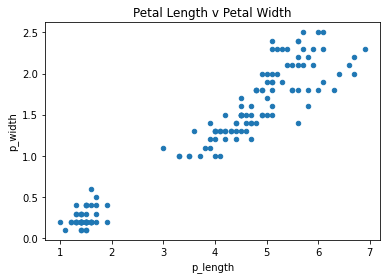

In [3]:
df.plot(x="p_length", y="p_width", kind="scatter",
       title="Petal Length v Petal Width")

We can definitely see a relationship here with these two varibales, so this should serve us well as some test data when looking at correlation and regression.

#### Since we are not trying to predict anything about the classes for now, we will just use the features provided to explore ideas

# Correlation
$\Large{r = \frac{1}{n-1} \sum_{i=1}^{n}(\frac{x_i - \overline{x} }{s_x})(\frac{y_i - \overline{y}}{s_y})}$

In [4]:
mean = lambda nums: sum(nums)/len(nums)
dev = lambda nums: math.sqrt(sum([(n-mean(nums))**2 for n in nums])/(len(nums)-1))
def correlation(x_data: list, y_data: list) -> float:
       
    # first get means
    xbar = mean(x_data)
    ybar = mean(y_data)
    
    # and deviations
    xdev = dev(x_data)
    ydev = dev(y_data)

    # create a new list of the points subracted from means over devs
    pairs = list(zip(x_data, y_data))
    sum_these = [((x-xbar)/xdev)*((y-ybar)/ydev) for x,y in pairs]
    
    return sum(sum_these)/(len(x_data)-1)

##### Lets quickly verify this function agaisnt scipy

In [5]:
print(correlation(
    x_data = df.p_length, 
    y_data = df.p_width)
)
print(scipy.stats.pearsonr(df.p_length, df.p_width)[0])

0.962865431402796
0.9628654314027963


Now that we've sufficiently re-invented the wheel - we can move on..

From this r coef of 0.963, we see that petal width and petal length have a pretty **strong positive correlation** to each other.

# Least Squares Regression Line Equation

$\Large \hat{y} = b_0 + b_1x$

*where*

$\Large b_1 = r\frac{s_y}{s_x} $

*and*

$\Large b_0 = \overline{y} - b_1\overline{x} $

In [6]:
class LeastSquaresLine:
    """Object for least squares return"""
    def __init__(self):
        self.intercept = None
        self.slope = None
    
    def __repr__(self):
        sign = "+" if self.intercept > 0 else ""
        return f"y={round(self.slope,3)}x{sign}{round(self.intercept,3)}"

Now that we have a nice compact, printable object. We can create our function that uses the formula above to calculate the equation for the line.

In [7]:
def least_sqaures(x_data: list, y_data: list) -> LeastSquaresLine:
    # Calculate slope & intercept
    lsl = LeastSquaresLine()
    lsl.slope = correlation(x_data, y_data)*(dev(y_data)/dev(x_data))
    lsl.intercept = mean(y_data) - lsl.slope*mean(x_data)
    return lsl
    

Lets call our function to get the values and the regression line.

In [8]:
lsl = least_sqaures(df.p_length, df.p_width)

And now plot our values and line to see how we did

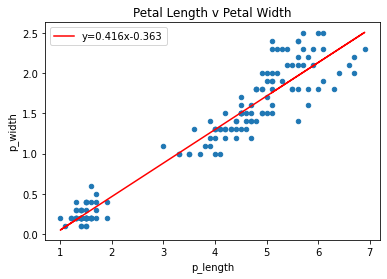

In [9]:
df.plot(x="p_length", y="p_width", kind="scatter",
       title="Petal Length v Petal Width")
plt.pyplot.plot(
    df.p_length, lsl.slope*df.p_length+lsl.intercept,
    color="red", label=lsl  # Label is the repr of the return
)
plt.pyplot.legend()

The least-squares line we created here from the formulas looks pretty accurate. 

For now this is where we will end. Keeping in mind that using libraries for this is much more practical, less time consuming, and just overall makes more sense. For review of formulas and concepts and even just general programming practice however, your own implementations can have benefit.